<a href="https://colab.research.google.com/github/vircsinger625/Onlab_2020_2/blob/main/%C3%96nlab_Mnist01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1B5KQvPySqYEa6XicRHdOwgv8fN1BrCgQ#scrollTo=ZJ-hYN00t2E2

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

https://github.com/AvivSham/Pytorch-MNIST-colab/blob/master/Pytorch_MNIST.ipynb

In [1]:
%matplotlib inline

In [ ]:
!pip install torch
!pip install torchvision

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import itertools
import time

from torch.autograd import Variable

print(torch.__version__)

1.6.0+cu101


In [4]:
# Python 2/3 compatibility
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):  #:param img: (PyTorch Tensor)
    img = img / 2 + 0.5                           # unnormalize
    npimg = img.numpy()                           # Convert tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    # Color channel first -> color channel last
    plt.show()

In [5]:
seed = 42
np.random.seed(seed)

if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True    # Make CuDNN Determinist
  torch.cuda.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define default device, we should use the GPU (cuda) if available

In [6]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step

In [7]:
#title Downloading MNIST data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]) #BW images https://stackoverflow.com/questions/59218671/runtimeerror-output-with-shape-1-224-224-doesnt-match-the-broadcast-shape

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transform, download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
#title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                        batch_size = batch_size,
                                        shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

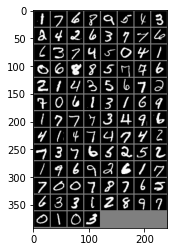

         1          7          6          8          9          5          4          3          2          4          2          6          3          7          7          6          6          3          7          4          5          0          4          1          0          6          8          8          5          7          7          6          2          1          4          3          5          6          7          2          7          0          6          1          3          1          6          9          1          7          7          7          3          4          9          6          4          1          4          7          4          7          4          2          7          3          7          6          5          2          5          2          1          9          6          9          2          6          1          7          7          0          0          7          8          7          6          5          6          3          3

In [9]:
# get some random training images
dataiter = iter(train_gen)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(batch_size)))

In [10]:
#title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [11]:
#title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [12]:
#title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

In [13]:
#title Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()
    
    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, i+1, torch.floor_divide(len(train_data), batch_size), loss.data))

Epoch [1/20], Step [100/600], Loss: 0.3759
Epoch [1/20], Step [200/600], Loss: 0.2995
Epoch [1/20], Step [300/600], Loss: 0.2479
Epoch [1/20], Step [400/600], Loss: 0.2273
Epoch [1/20], Step [500/600], Loss: 0.1670
Epoch [1/20], Step [600/600], Loss: 0.0969
Epoch [2/20], Step [100/600], Loss: 0.2321
Epoch [2/20], Step [200/600], Loss: 0.0786
Epoch [2/20], Step [300/600], Loss: 0.1956
Epoch [2/20], Step [400/600], Loss: 0.1429
Epoch [2/20], Step [500/600], Loss: 0.1405
Epoch [2/20], Step [600/600], Loss: 0.1235
Epoch [3/20], Step [100/600], Loss: 0.0746
Epoch [3/20], Step [200/600], Loss: 0.0651
Epoch [3/20], Step [300/600], Loss: 0.0318
Epoch [3/20], Step [400/600], Loss: 0.2415
Epoch [3/20], Step [500/600], Loss: 0.0826
Epoch [3/20], Step [600/600], Loss: 0.1347
Epoch [4/20], Step [100/600], Loss: 0.0960
Epoch [4/20], Step [200/600], Loss: 0.0763
Epoch [4/20], Step [300/600], Loss: 0.0505
Epoch [4/20], Step [400/600], Loss: 0.1449
Epoch [4/20], Step [500/600], Loss: 0.0609
Epoch [4/20

In [15]:
#Title Evaluating the accuracy of the model

correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,28*28)).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

#print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))
print('Accuracy of the model: %.3f %%' %(torch.true_divide((100*correct),(total+1)))) 
#RuntimeError: Integer division of tensors using div or / is no longer supported, and in a future release div will perform true division as in Python 3. 
#Use true_divide or floor_divide (// in Python) instead.

Accuracy of the model: 97.660 %
